# Машинное обучение: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

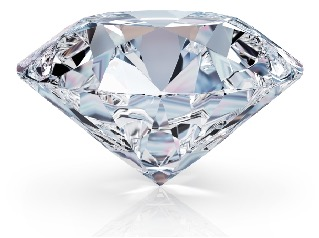

**Цели на сегодня:**

* разобраться в алгоритмах KNN и NaiveBayes

* построить Explainer Dashboard

## Импорт библиотек и загрузка данных

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_clean.csv"

In [3]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

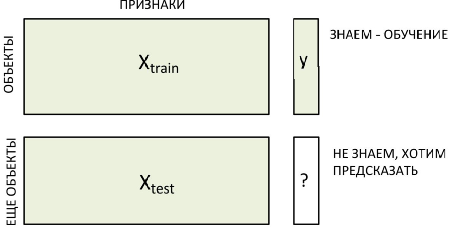

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

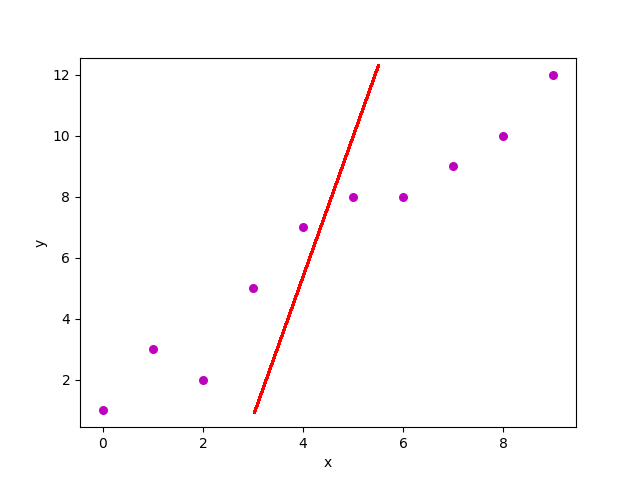

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

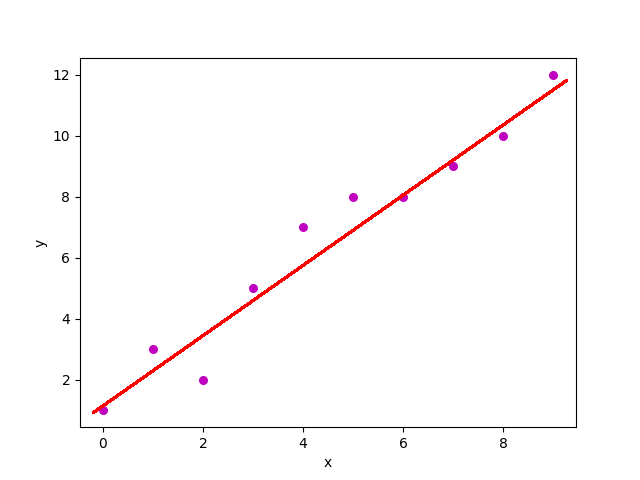

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [5]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y = df['price']

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [7]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred), np.mean(y)

(977.2282539113676, 3933.562828733389)

## Анализ распределения столбцов (целевой переменной)

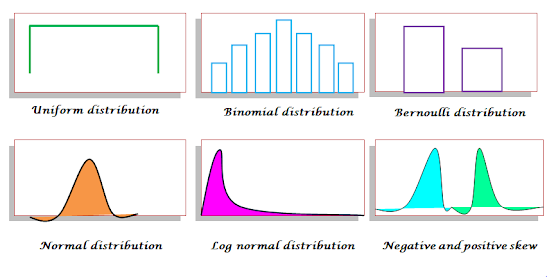

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

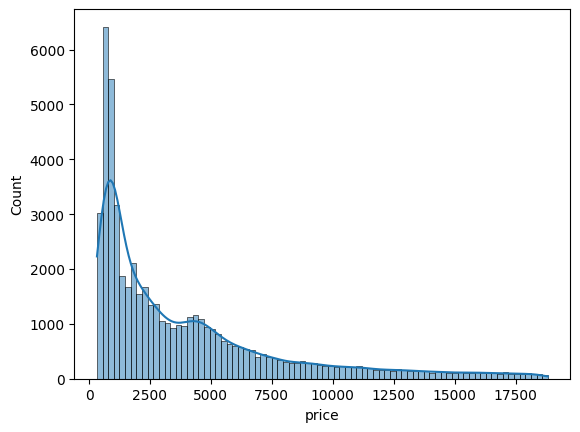

In [8]:
sns.histplot(data = df['price'], kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [9]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

764.9688224207086

In [10]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

2957.8679605456914

Действительно, ошибка на дорогих алмазах больше.

# Простые нелинейные модели: классификация

## Наивный байесовский классификатор

In [11]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y_class = (y > 2500).astype(int)

In [12]:
y_class.value_counts()

0    27464
1    26341
Name: price, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9397115670532263

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[6225,  632],
       [ 179, 6416]])

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

In [18]:
accuracy_score(y_test, pred_knn)

0.9415700267618198

In [19]:
confusion_matrix(y_test, pred_knn)

array([[6416,  441],
       [ 345, 6250]])

## Кросс-валидация

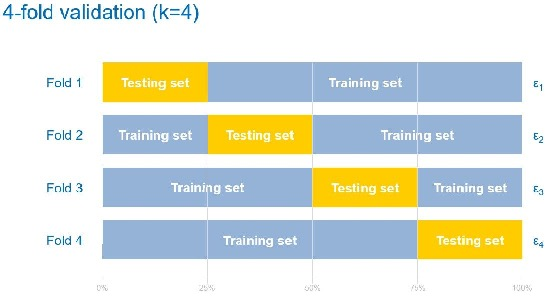

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_cl, X, y_class, scoring='accuracy', cv=3, n_jobs=-1).mean()

0.8938016912926307

In [21]:
from sklearn.model_selection import cross_validate

cross_validate(knn_cl, X, y_class, scoring=['accuracy', 'f1'], cv=3, n_jobs=-1)

{'fit_time': array([0.101861  , 0.13595033, 0.05752349]),
 'score_time': array([1.9849534 , 1.92787194, 1.0461638 ]),
 'test_accuracy': array([0.86936158, 0.99632004, 0.81572345]),
 'test_f1': array([0.84602747, 0.99624744, 0.83911795])}

## Подбор гиперпараметров моделей

При подборе гиперпараметров мы разбиваем выборку на три части:
* train - обучение модели
* validation - применение модели для разных наборов гиперпараметров
* test - проверка качества модели с лучшими найденными гиперпараметрами

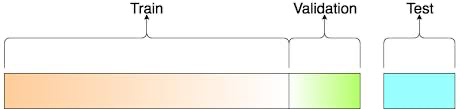

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [23]:
best_k = -1
best_acc = -1

for k in np.arange(2, 30, 1):
    knn_cl = KNeighborsClassifier(n_neighbors=k) # по умолчанию n_neighbors=5

    knn_cl.fit(X_train, y_train)
    pred_knn = knn_cl.predict(X_val)
    acc = accuracy_score(y_val, pred_knn)

    if acc > best_acc:
        best_k = k
        best_acc = acc

    print('n_neighbors:', k, 'accuracy:', acc)

print(best_k, best_acc)

n_neighbors: 2 accuracy: 0.9295272078501338
n_neighbors: 3 accuracy: 0.936366339577758
n_neighbors: 4 accuracy: 0.935474278917633
n_neighbors: 5 accuracy: 0.9396372286648825
n_neighbors: 6 accuracy: 0.9396372286648825
n_neighbors: 7 accuracy: 0.9416195856873822
n_neighbors: 8 accuracy: 0.9405292893250075
n_neighbors: 9 accuracy: 0.9417187035385073
n_neighbors: 10 accuracy: 0.9413222321340073
n_neighbors: 11 accuracy: 0.9414213499851323
n_neighbors: 12 accuracy: 0.9420160570918823
n_neighbors: 13 accuracy: 0.9428089999008822
n_neighbors: 14 accuracy: 0.9427098820497571
n_neighbors: 15 accuracy: 0.9421151749430072
n_neighbors: 16 accuracy: 0.9418178213896323
n_neighbors: 17 accuracy: 0.9421151749430072
n_neighbors: 18 accuracy: 0.9426107641986322
n_neighbors: 19 accuracy: 0.9432054713053821
n_neighbors: 20 accuracy: 0.943998414114382
n_neighbors: 21 accuracy: 0.943800178412132
n_neighbors: 22 accuracy: 0.9431063534542571
n_neighbors: 23 accuracy: 0.9436019427098821
n_neighbors: 24 accura

In [24]:
knn_cl = KNeighborsClassifier(n_neighbors=20) # по умолчанию n_neighbors=5

knn_cl.fit(X_train, y_train)
pred_knn = knn_cl.predict(X_test)

acc = accuracy_score(y_test, pred_knn)
print(acc)

0.9447665774606007


In [25]:
confusion_matrix(y_test, pred_knn)

array([[6444,  413],
       [ 330, 6265]])

## Подбор гиперпараметров по сетке

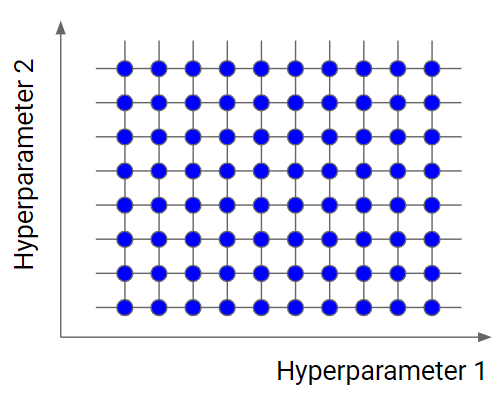

In [26]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [27]:
gs.best_score_, gs.best_params_

(0.9465962877605135, {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'})

In [28]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.9461790068391317

In [29]:
confusion_matrix(y_test, pred)

array([[6467,  390],
       [ 334, 6261]])

# Explainer Dashboard

[tutorial](https://github.com/oegedijk/explainerdashboard/blob/c7c515c05c5a161226193e40a8258c310fc7901d/notebooks/dashboard_examples.ipynb)

In [30]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.2 MB/s eta 0:00:00


In [31]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer, ExplainerDashboard

In [32]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [33]:
explainer = ClassifierExplainer(gs.best_estimator_, X_test.iloc[:1000], y_test.iloc[:1000])

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [34]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/1000 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [35]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Домашнее задание

## KNN для задачи регрессии

In [36]:
X = df[['carat','depth','table',"'x'","'y'","'z'"]]
y_reg = df['price']

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

### Задание 1

Чему равна ошибка MAE на кросс-валидации с тремя фолдами? Ответ округлите до целого числа.

In [42]:


# scoring = 'neg_mean_absolute_error'
cross_val_score(knn_reg, X, y_reg, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1).mean()

# your code here

-1959.366278226931

Разобъем данные на трейн и тес

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.25, random_state=42)

### Задание 2

Обучите KNN с гиперпараметрами по умолчанию на тренировочных данных и вычислите MAE на тесте. Ответ округлите до целого числа.

In [44]:
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor().fit(X_train, y_train)

In [46]:
y_hat = knn.predict(X_test)
mean_absolute_error(y_test, y_hat)

825.9063633660421

### Задание 3

Подберите по сетке на тренировочных данных гиперпараметры метода:

* `n_neighbors` в диапазоне от 2 до 30 не включительно с шагом 2
* `weights` - `uniform` или `distance`
* `p` - 1 или 2

Метрика - `neg_mean_squared_error`, `cv=3`

Чему равно число соседей у наилучшей модели?

In [51]:
knn = KNeighborsRegressor()

In [53]:
params = {'n_neighbors' : np.arange(2, 30, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(knn, params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [54]:
gs.best_params_

{'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

### Задание 4

Вычислите качество наилучшей найденной модели на тестовых данных (MAE), ответ округлите до целого числа.

In [55]:
mean_absolute_error(y_test, gs.best_estimator_.predict(X_test))

784.8629970052249

### Задание 5

Постройте explainer dashboard для наилучшей модели (на первых 1000 объектах тестовой выборки).

Какой признак по методу SHAP самый важный для модели?

In [62]:
explainer = RegressionExplainer(gs.best_estimator_, X_test.iloc[:1000], y_test.iloc[:1000])

Generating self.shap_explainer = shap.KernelExplainer(model, X)...


In [69]:
explainer.columns_ranked_by_shap()

["'y'", "'x'", "'z'", 'carat', 'depth', 'table']

In [63]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/1000 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [66]:
ExplainerDashboard.terminate(8050)

Trying to shut down dashboard on port 8050...


In [124]:
# db.run()

### Задание 6

По explainer dashboard ответьте, чему равен прогноз модели для объекта с индексом 32390?

Ответ округлите до целого числа.

In [132]:
explainer.prediction_result_df(index='32390')

,,price
0,Predicted,793.893
1,Observed,795.000
2,Residual,1.107


### Задание 7

По explainer dashboard ответьте, какой признак с точки зрения подхода SHAP дает наибольший вклад в прогноз на объекте с индексом 6234?

In [123]:
explainer.get_shap_row(index='6234')

,carat,depth,table,'x','y','z'
26,-123.218167,190.205964,-140.3405,-143.527488,-166.195845,-80.702536
